In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Đọc dữ liệu
df = pd.read_csv('query.csv')
df1 = pd.read_csv('query1.csv').head(300)



# Xác định các cột ngày tháng phổ biến
date_cols = ['dateOfBirth', 'dateOfDeath', 'careerStart', 'careerEnd']

# Chuyển đổi các cột ngày tháng sang datetime nếu tồn tại
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    if col in df1.columns:
        df1[col] = pd.to_datetime(df1[col], errors='coerce')

# Xác định lại các cột ngày tháng đã chuyển đổi (chỉ lấy cột thực sự có trong từng DataFrame)
date_cols_df = [col for col in date_cols if col in df.columns]
date_cols_df1 = [col for col in date_cols if col in df1.columns]

# Xóa các dòng có giá trị không phải ngày tháng (NaT) ở bất kỳ cột ngày tháng nào
if date_cols_df:
    df = df.dropna(subset=date_cols_df).copy().reset_index(drop=True)
if date_cols_df1:
    df1 = df1.dropna(subset=date_cols_df1).copy().reset_index(drop=True)

print(f"Số dòng còn lại ở df: {len(df)}")
print(f"Số dòng còn lại ở df1: {len(df1)}")

# Tính cột tuổi thọ (năm)
if {'dateOfBirth', 'dateOfDeath'}.issubset(df.columns):
    df['tuoi_tho'] = (df['dateOfDeath'] - df['dateOfBirth']).dt.days // 365
if {'dateOfBirth', 'dateOfDeath'}.issubset(df1.columns):
    df1['tuoi_tho'] = (df1['dateOfDeath'] - df1['dateOfBirth']).dt.days // 365

# Tính cột tuổi nghề (năm)
if {'careerStart', 'careerEnd'}.issubset(df.columns):
    df['tuoi_nghe'] = (df['careerEnd'] - df['careerStart']).dt.days // 365
if {'careerStart', 'careerEnd'}.issubset(df1.columns):
    df1['tuoi_nghe'] = (df1['careerEnd'] - df1['careerStart']).dt.days // 365

# Chỉ in ra các cột có tồn tại để tránh lỗi KeyError
cols_to_show_df = [col for col in ['tuoi_tho', 'tuoi_nghe'] if col in df.columns]
cols_to_show_df1 = [col for col in ['tuoi_tho', 'tuoi_nghe'] if col in df1.columns]
print(df[cols_to_show_df].head())
print(df1[cols_to_show_df1].head())
print(df.describe())
print(df1.describe())
df_no_outlier = df
df1_no_outlier = df1

Số dòng còn lại ở df: 315
Số dòng còn lại ở df1: 279
   tuoi_tho  tuoi_nghe
0       198          2
1        87         36
2        71         33
3        24         15
4        98          3
   tuoi_tho  tuoi_nghe
0        78         27
1        83         17
2        70         51
3       100          5
4        21         13
         tuoi_tho   tuoi_nghe
count  315.000000  315.000000
mean    72.634921   17.580952
std     20.902032   14.305213
min      0.000000    0.000000
25%     61.500000    8.000000
50%     78.000000   13.000000
75%     87.000000   21.000000
max    198.000000   84.000000
         tuoi_tho   tuoi_nghe
count  279.000000  279.000000
mean    69.401434   13.942652
std     20.578769    7.206383
min    -68.000000    0.000000
25%     61.500000   11.000000
50%     75.000000   13.000000
75%     82.000000   16.000000
max    130.000000   60.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30248\611830757.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1[col] = pd.to_datetime(df1[col], errors='coerce')


In [3]:
# # Remove outliers (IQR) for query.csv (df) and query1.csv (df1)
# import pandas as pd

# def remove_outliers_iqr_df(df, cols):
#     """Remove rows that are outliers in any of the specified numeric columns using the IQR rule.
#     Returns a cleaned copy of the DataFrame.
#     """
#     if df is None or len(df) == 0:
#         return df
#     mask = pd.Series(True, index=df.index)
#     for col in cols:
#         if col in df.columns:
#             Q1 = df[col].quantile(0.25)
#             Q3 = df[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower = Q1 - 1.5 * IQR
#             upper = Q3 + 1.5 * IQR
#             mask &= df[col].between(lower, upper)
#     return df[mask].copy().reset_index(drop=True)

# # Columns to consider for outliers (longevity and career duration if present)
# cols_df = [c for c in ['tuoi_tho', 'tuoi_nghe'] if c in globals().get('df', pd.DataFrame()).columns]
# cols_df1 = [c for c in ['tuoi_tho', 'tuoi_nghe'] if c in globals().get('df1', pd.DataFrame()).columns]

# # Apply removal and create new variables for downstream use
# if 'df' in globals():
#     if cols_df:
#         df_no_outlier = remove_outliers_iqr_df(df, cols_df)
#         print(f"query.csv: before={len(df)}, after={len(df_no_outlier)}, removed={len(df)-len(df_no_outlier)}")
#     else:
#         df_no_outlier = df.copy()
#         print("query.csv: no 'tuoi_tho' or 'tuoi_nghe' columns found; no outlier removal applied.")
# else:
#     print("Variable 'df' not found. Run the data-loading cell first.")

# if 'df1' in globals():
#     if cols_df1:
#         df1_no_outlier = remove_outliers_iqr_df(df1, cols_df1)
#         print(f"query1.csv: before={len(df1)}, after={len(df1_no_outlier)}, removed={len(df1)-len(df1_no_outlier)}")
#     else:
#         df1_no_outlier = df1.copy()
#         print("query1.csv: no 'tuoi_tho' or 'tuoi_nghe' columns found; no outlier removal applied.")
# else:
#     print("Variable 'df1' not found. Run the data-loading cell first.")

# print(df_no_outlier.describe())
# print(df1_no_outlier.describe())


In [4]:
# Xóa các dòng có tuổi thọ < 20 hoặc >120 cho cả df và df1 (và các bản đã loại outlier nếu muốn)
df = df[(df['tuoi_tho'] >= 20) & (df['tuoi_tho'] <= 120)].copy().reset_index(drop=True)
df1 = df1[(df1['tuoi_tho'] >= 20) & (df1['tuoi_tho'] <= 120)].copy().reset_index(drop=True)

# Nếu có các biến đã loại outlier thì cũng cập nhật
if 'df_no_outlier' in globals():
    df_no_outlier = df_no_outlier[(df_no_outlier['tuoi_tho'] >= 20) & (df_no_outlier['tuoi_tho'] <= 120)].copy().reset_index(drop=True)
if 'df1_no_outlier' in globals():
    df1_no_outlier = df1_no_outlier[(df1_no_outlier['tuoi_tho'] >= 20) & (df1_no_outlier['tuoi_tho'] <= 120)].copy().reset_index(drop=True)

In [5]:
x_col = 'tuoi_nghe'
y_col = 'tuoi_tho'

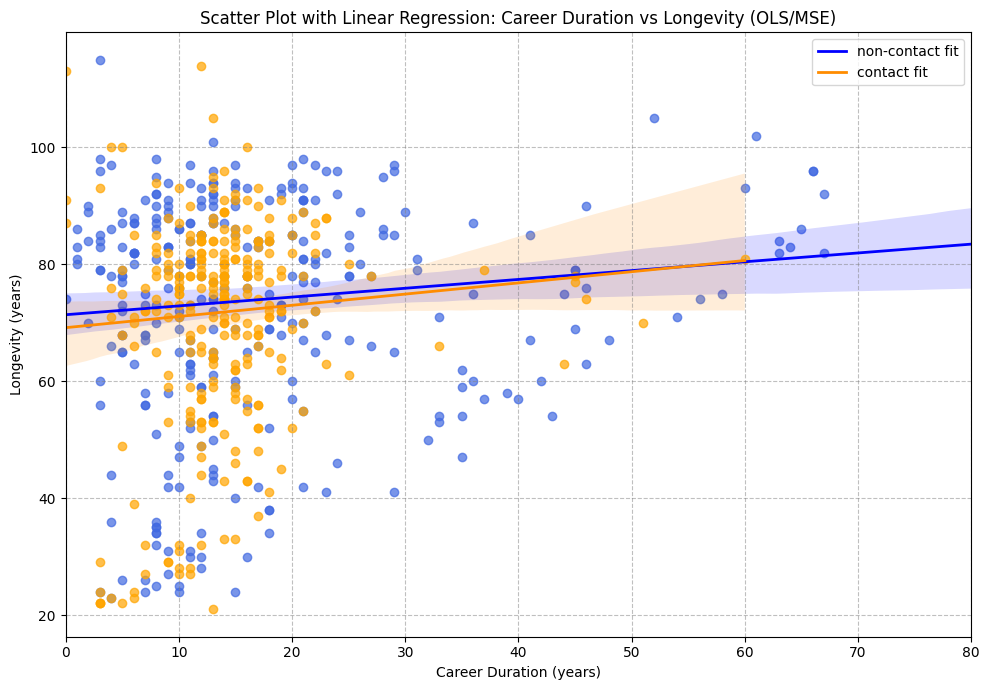

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 7))

# 1. Vẽ Hồi quy và Scatter cho nhóm NON-CONTACT (Màu xanh dương)
# regplot tự động sử dụng OLS (tối thiểu hóa Sai số Trung bình Bình phương - MSE)
sns.regplot(
    data=df_no_outlier,
    x=x_col,
    y=y_col,
    scatter=True,
    robust=True, 
    # Cấu hình cho các điểm
    scatter_kws={'alpha': 0.7, 'color': 'royalblue', 'label': 'non-contact'},
    # Cấu hình cho đường hồi quy
    line_kws={'color': 'blue', 'linewidth': 2, 'label': 'non-contact fit'},
    ci=95, # Dải tin cậy 95%
    ax=plt.gca()
)

# 2. Vẽ Hồi quy và Scatter cho nhóm CONTACT (Màu cam)
# regplot tự động sử dụng OLS (tối thiểu hóa Sai số Trung bình Bình phương - MSE)
sns.regplot(
    data=df1_no_outlier,
    x=x_col,
    y=y_col,
    scatter=True,
    robust=True, 
    # Cấu hình cho các điểm
    scatter_kws={'alpha': 0.7, 'color': 'orange', 'label': 'contact'},
    # Cấu hình cho đường hồi quy
    line_kws={'color': 'darkorange', 'linewidth': 2, 'label': 'contact fit'},
    ci=95, # Dải tin cậy 95%
    ax=plt.gca()
)

# --- Tùy chỉnh Đồ thị để khớp với ảnh gốc ---

# Tiêu đề và nhãn
plt.title('Scatter Plot with Linear Regression: Career Duration vs Longevity (OLS/MSE)', fontsize=12)
plt.xlabel('Career Duration (years)', fontsize=10)
plt.ylabel('Longevity (years)', fontsize=10)

# Lưới
plt.grid(True, linestyle='--', alpha=0.5, color='gray')

# Cấu hình trục x
plt.xlim(0, 80)
plt.xticks(range(0, 81, 10))

# Cấu hình Legend (Chú thích)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

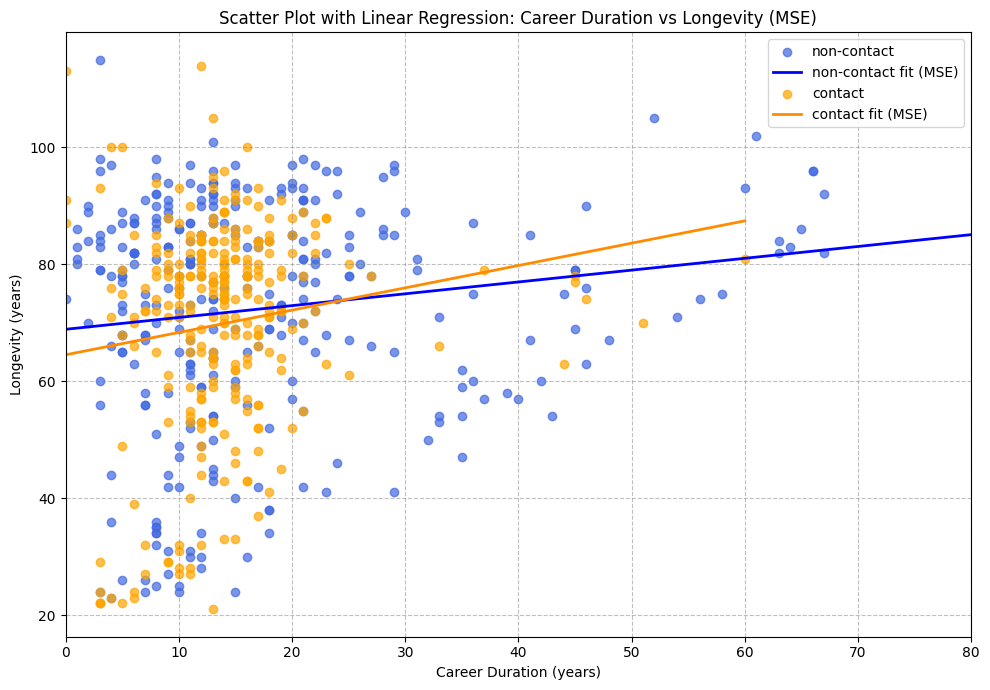

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Hàm vẽ hồi quy sử dụng MSE (LinearRegression mặc định tối thiểu hóa MSE)
def plot_mse_regression(df, x_col, y_col, scatter_color, line_color, label_prefix):
    X = df[[x_col]].values
    y = df[y_col].values

    # Khởi tạo mô hình hồi quy tuyến tính (tối thiểu hóa MSE)
    model = LinearRegression()
    model.fit(X, y)

    # Dự đoán giá trị y từ X
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)

    # Vẽ scatter
    plt.scatter(X, y, alpha=0.7, color=scatter_color, label=f'{label_prefix}')

    # Vẽ đường hồi quy
    plt.plot(x_range, y_pred, color=line_color, linewidth=2, label=f'{label_prefix} fit (MSE)')

# Vẽ biểu đồ
plt.figure(figsize=(10, 7))

# Vẽ cho nhóm NON-CONTACT
plot_mse_regression(
    df=df_no_outlier,
    x_col=x_col,
    y_col=y_col,
    scatter_color='royalblue',
    line_color='blue',
    label_prefix='non-contact'
)

# Vẽ cho nhóm CONTACT
plot_mse_regression(
    df=df1_no_outlier,
    x_col=x_col,
    y_col=y_col,
    scatter_color='orange',
    line_color='darkorange',
    label_prefix='contact'
)

# Tùy chỉnh đồ thị
plt.title('Scatter Plot with Linear Regression: Career Duration vs Longevity (MSE)', fontsize=12)
plt.xlabel('Career Duration (years)', fontsize=10)
plt.ylabel('Longevity (years)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5, color='gray')
plt.xlim(0, 80)
plt.xticks(range(0, 81, 10))
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


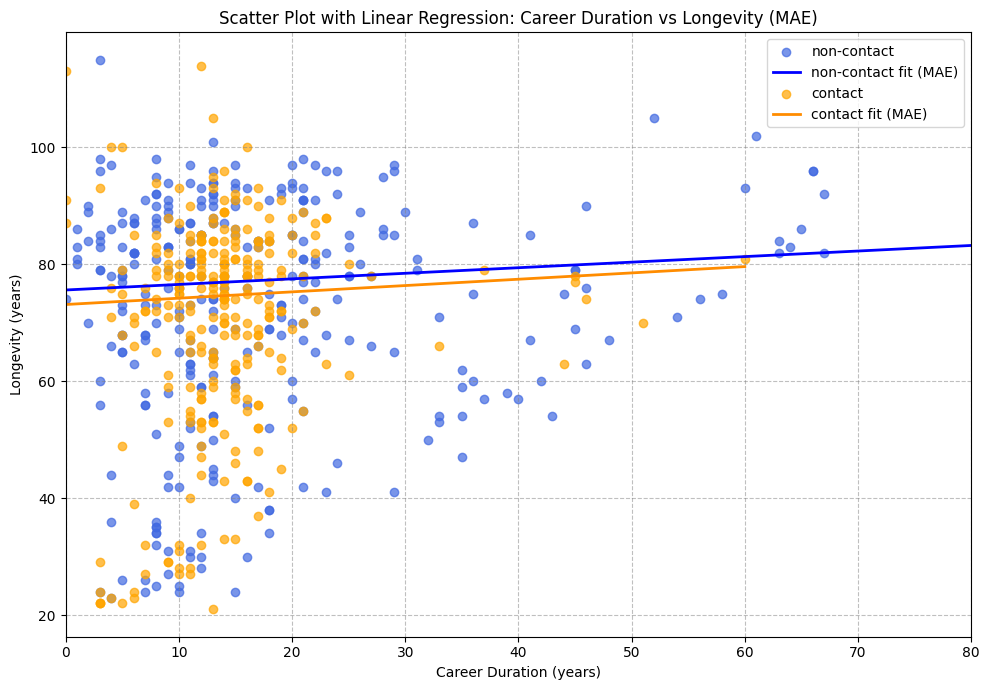

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import QuantileRegressor
import seaborn as sns

# Hàm vẽ hồi quy sử dụng MAE
def plot_mae_regression(df, x_col, y_col, scatter_color, line_color, label_prefix):
    X = df[[x_col]].values
    y = df[y_col].values

    # Khởi tạo mô hình hồi quy tuyến tính tối thiểu hóa MAE
    model = QuantileRegressor(quantile=0.5, alpha=0)  # quantile=0.5 → MAE
    model.fit(X, y)

    # Dự đoán giá trị y từ X
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)

    # Vẽ scatter
    plt.scatter(X, y, alpha=0.7, color=scatter_color, label=f'{label_prefix}')

    # Vẽ đường hồi quy
    plt.plot(x_range, y_pred, color=line_color, linewidth=2, label=f'{label_prefix} fit (MAE)')

# Vẽ biểu đồ
plt.figure(figsize=(10, 7))

# Vẽ cho nhóm NON-CONTACT
plot_mae_regression(
    df=df_no_outlier,
    x_col=x_col,
    y_col=y_col,
    scatter_color='royalblue',
    line_color='blue',
    label_prefix='non-contact'
)

# Vẽ cho nhóm CONTACT
plot_mae_regression(
    df=df1_no_outlier,
    x_col=x_col,
    y_col=y_col,
    scatter_color='orange',
    line_color='darkorange',
    label_prefix='contact'
)

# Tùy chỉnh đồ thị
plt.title('Scatter Plot with Linear Regression: Career Duration vs Longevity (MAE)', fontsize=12)
plt.xlabel('Career Duration (years)', fontsize=10)
plt.ylabel('Longevity (years)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5, color='gray')
plt.xlim(0, 80)
plt.xticks(range(0, 81, 10))
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
